### Outliers:
An Outlier is a data-point that deviated significantly from the rest of the objects

### Methods for identifying outlier
1. Boxplot
2. scatterplot
3. IQR(Inter Quartile Range) ==> upper = Q3 + 1.5 * IQR , lower = Q1 - 1.5 * IQR
4. Z-score ==> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\heights.csv')
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

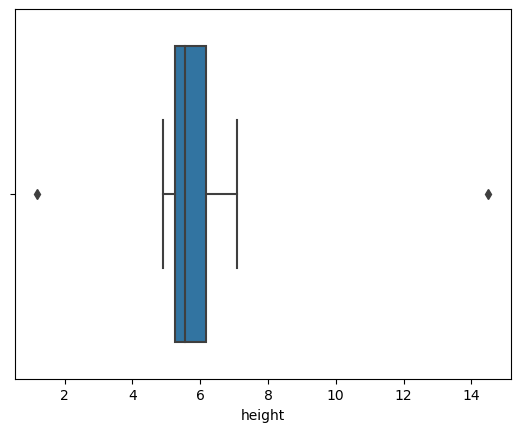

In [3]:
sns.boxplot(df['height'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name', ylabel='height'>

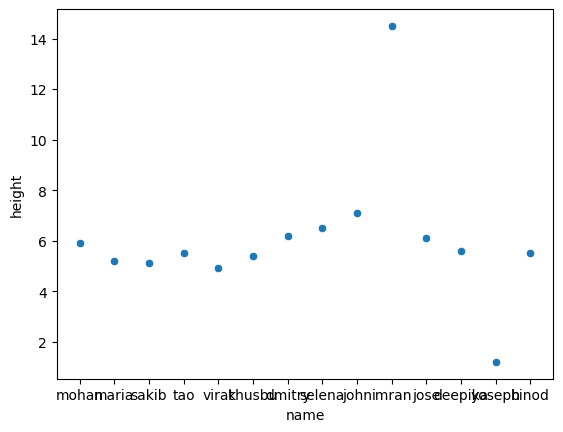

In [5]:
sns.scatterplot(df['name'],df['height'])

### IQR

In [6]:
#quantile() ==> calculates percentage values
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.9249999999999998


In [7]:
df.describe()

,height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [8]:
Q1

5.25

In [9]:
Q3

6.175

In [10]:
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
print(lower,upper)

3.8625000000000003 7.5625


In [20]:
#np.where() ==> tuple ==> array,dtype
upper_array = np.where(df['height'] >= upper)[0]
lower_array = np.where(df['height'] <= lower)[0]
print(upper_array,lower_array)

[9] [12]


In [15]:
np.where(df['height'] >= upper)

(array([9], dtype=int64),)

In [16]:
upper_array

array([9], dtype=int64)

In [19]:
x = (1,)
print(type(x))

<class 'tuple'>


In [22]:
#removing outliers from the DF
df.drop(index = upper_array,inplace = True)

In [25]:
#replace outlier in the DF
df['height'] = np.where(df['height'] <= lower,np.median(df['height']),df['height'])
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


### using z-score
when any scaled data point is above 3 and below -3 then it is known as an outliers

In [28]:
df = pd.read_csv(r'C:\Users\hp\Downloads\heights.csv')
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [26]:
from sklearn.preprocessing import scale

In [29]:
df['height'] = scale(df['height'])
df

,name,height
0,mohan,-0.055998
1,maria,-0.317320
2,sakib,-0.354652
3,tao,-0.205325
4,virat,-0.429315
5,khusbu,-0.242656
6,dmitry,0.055998
7,selena,0.167993
8,john,0.391983
9,imran,3.154532


### Outlier detection and removal

In [30]:
df = pd.read_csv(r'C:\Users\hp\Downloads\heights.csv')

#identify Q1 and Q3 values
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#find lower and upper values
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

#find lower and upper values corresponding indexes
upper_array = np.where(df['height'] >= upper)[0]
lower_array = np.where(df['height'] <= lower)[0]

#remove those outliers
df.drop(index = upper_array,inplace = True)
df.drop(index = lower_array,inplace = True)